https://mindbox.ru/academy/ab-test-calculator/

Определили что тест будет идти 20 дней. В каждой группе по 100 тыс наблюдений

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import *

In [ ]:
#a_web = a_web.drop(columns=['Unnamed: 0','uid','kk_id_x','ref','bizmod_x','cdt','kk_id_y','bizmod_y','view','response'])

In [ ]:
#a_web.to_excel(r'C:/Users/Profi/Downloads/example.xlsx')

In [14]:
a_web = pd.read_excel('example.xlsx')
a_web.head(30)

,case_id,spec_id,order_id,first_dt,e_dt,d_view
0,B,ffa2dd59dc131d92994c2f267c19251dbb836ecbb11eec...,NaN,NaT,NaT,NaT
1,B,e800fca7e8c2e643c56572d66933bfeaf2cc66a914328d...,NaN,NaT,NaT,NaT
2,B,c28ed784882c00fff28a0b0fdd434127bb5de905ca2318...,NaN,NaT,NaT,NaT
3,B,f651bd1ee3f165513b5096aa0e858529da005ae656563e...,NaN,NaT,NaT,NaT
4,B,002fa07fb4f6c54fcc8934855e7bd5fe2167f8526c23f6...,NaN,NaT,NaT,NaT
5,B,5ed3bc204623d795cfef6f58c6d5ff72fe2167d104930a...,NaN,NaT,NaT,NaT
6,B,23d28918997b4f75e3397c3b3d9b989e9b81d02163b625...,18112901.0,2019-03-25 00:05:24,NaT,2019-03-25
7,B,d4cbb1c1394ff825932392a1a46a5865547d598655f6e8...,NaN,NaT,NaT,NaT
8,B,6c63ea5727d6d834f303c7bfbf3845d70a3d9f68e1c917...,NaN,NaT,NaT,NaT
9,B,bc911f5b8448ca396fe967c35147f8083efc065d4cd64e...,18190878.0,2019-03-29 08:43:35,NaT,2019-03-29


In [3]:
a_web.dtypes

case_id             object
spec_id             object
order_id           float64
first_dt    datetime64[ns]
e_dt        datetime64[ns]
d_view      datetime64[ns]
dtype: object

In [4]:
a_web.shape

(302364, 6)

In [5]:
a_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302364 entries, 0 to 302363
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   case_id   302364 non-null  object        
 1   spec_id   302364 non-null  object        
 2   order_id  229900 non-null  float64       
 3   first_dt  229900 non-null  datetime64[ns]
 4   e_dt      43536 non-null   datetime64[ns]
 5   d_view    229900 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(2)
memory usage: 13.8+ MB


In [18]:
# для корректной работы метода isnan()
a_web ['e_dt'] = pd.to_datetime(a_web ['e_dt']).dt.day

# Конверсия и p-value

Метрика - доля заказов, на которое специалист откликнулся, относительно всех просмотренных заказов, или конверсия из просмотра в отклик.

In [19]:
# для удобства подсчетов
# Просмотр
a_web['view'] = a_web.apply(lambda x: str(x.spec_id) + str(x.order_id)  if ~np.isnan(x.order_id) else np.nan, axis=1)
# Ответ
a_web['response'] = a_web.apply(lambda x: str(x.spec_id) + str(x.order_id)  if ~np.isnan(x.e_dt) else np.nan, axis=1)

In [63]:
a_web[a_web.d_view.notna()].head()

,case_id,spec_id,order_id,first_dt,e_dt,d_view,view,response
6,B,23d28918997b4f75e3397c3b3d9b989e9b81d02163b625...,18112901.0,2019-03-25 00:05:24,NaN,2019-03-25,23d28918997b4f75e3397c3b3d9b989e9b81d02163b625...,NaN
9,B,bc911f5b8448ca396fe967c35147f8083efc065d4cd64e...,18190878.0,2019-03-29 08:43:35,NaN,2019-03-29,bc911f5b8448ca396fe967c35147f8083efc065d4cd64e...,NaN
10,B,bc911f5b8448ca396fe967c35147f8083efc065d4cd64e...,18190878.0,2019-03-29 08:43:35,NaN,2019-03-29,bc911f5b8448ca396fe967c35147f8083efc065d4cd64e...,NaN
11,B,bc911f5b8448ca396fe967c35147f8083efc065d4cd64e...,18216799.0,2019-03-29 16:32:47,NaN,2019-03-29,bc911f5b8448ca396fe967c35147f8083efc065d4cd64e...,NaN
12,B,bc911f5b8448ca396fe967c35147f8083efc065d4cd64e...,18238209.0,2019-03-30 17:57:32,NaN,2019-03-30,bc911f5b8448ca396fe967c35147f8083efc065d4cd64e...,NaN


Считаем кумулятивное число просмотров и откликов по вариантам, изменение конверсии по дням и ее стат.значимость с помощью z-test

In [21]:
# Количество уникальных просмотров и откликов
a_views = a_web.groupby(['case_id','d_view']).agg({'view':'nunique','response':'nunique'})

In [40]:
c = a_views.groupby('case_id').cumsum()
c['conversion']=c.response/c.view
c.tail()

view  response  conversion
case_id d_view                                  
B       2019-04-15   88804     15667    0.176422
        2019-04-16   92326     16284    0.176375
        2019-04-17   96046     16955    0.176530
        2019-04-18   99537     17580    0.176618
        2019-04-19  101343     17884    0.176470

In [38]:
# последний день
c.query("d_view=='2019-04-19'")

,,view,response,conversion
case_id,d_view,,,
A,2019-04-19,90488,18390,0.203231
B,2019-04-19,101343,17884,0.176470


Конверсия В < A

In [41]:
import pylab
import matplotlib.dates as mdates

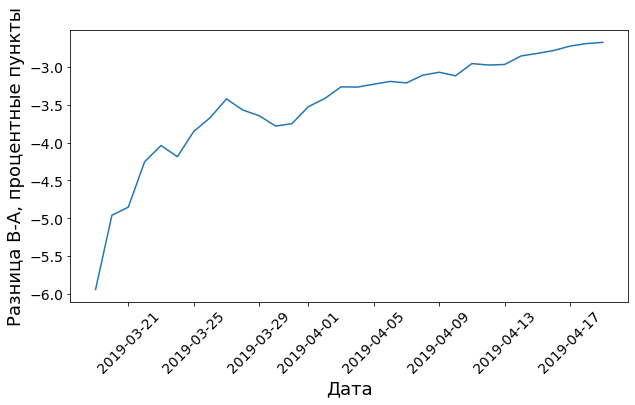

In [46]:
diff = pd.DataFrame(c.conversion.loc['B'] - c.conversion.loc['A'])

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(diff*100)
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Дата", fontsize=18)
plt.ylabel("Разница В-А, процентные пункты", fontsize=18)
plt.show()
# diff.plot(kind='line',alpha=0.75, rot=0)
# plt.xlabel("")
# plt.show()

### ztest

Text(0, 0.5, 'p-value, логарифм. шкала')

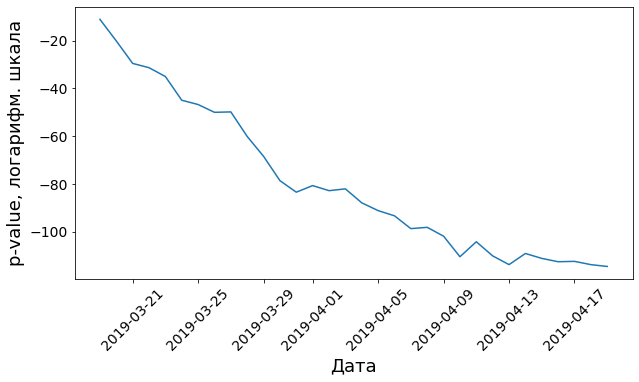

In [55]:
from statsmodels.stats.proportion import proportions_ztest
new_ar=[]
for i in range(len(c.loc['A'])):
    count = np.array([c.response.loc['A'][i], c.response.loc['B'][i]])
    nobs = np.array([c.view.loc['A'][i], c.view.loc['B'][i]])
    stat, pval = proportions_ztest(count, nobs)
    new_ar.append(pval)
    
p_value = pd.DataFrame(new_ar)
p_value = p_value.rename(columns={0: "p_val"})
p_value['date'] =  c.loc['A'].reset_index().d_view

p_value = p_value.set_index('date')

# p_value.plot(kind='line',alpha=10, rot=0,logy=True,figsize=(15,10),fontsize = 18)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# ax.set_yscale('log')

fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(np.log(p_value.p_val))
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Дата",fontsize=18)
plt.ylabel("p-value, логарифм. шкала",fontsize=18)

# Метрики по спецам

In [65]:
a_views_by_spec = a_web.groupby(['case_id','spec_id']).agg({'view':'nunique','response':'nunique'})

In [66]:
a_views_by_spec

view  response
case_id spec_id                                                           
A       00005e804540ae2671aa53998ed7497983f89449746babe...     0         0
        00016f5b07b639fc203809bd914a2e307881c3eb8b69c62...     0         0
        00017abfb978e4c3f8d870b56f418d8dda19a9b3357b10f...     6         1
        0001d918d29aa0384ea723ae2514e60a44d6e2df71619d0...     0         0
        00021f0647e6380456ed7c76378ae06ba2f4a2a688a261e...     0         0
...                                                          ...       ...
B       fffb99c4e5f24d78ba4b2272fb2cd19aac1727002342cf4...     2         1
        fffc06887246af2d4d2684761b052fec0397fff643d2fe3...     3         1
        fffc0eb4c4efcbf4cb789d7da2ce7d01da36b79965e8344...     0         0
        ffff325cf26453d6a8565f892c80910b6e4c2253e4fd849...     0         0
        ffff80f4d8a4f9c81e91aeade906ea9bf4efe7c69b0b4c7...     0         0

[114330 rows x 2 columns]

In [67]:
a_views_by_spec.groupby('case_id').view.describe()

,count,mean,std,min,25%,50%,75%,max
case_id,,,,,,,,
A,56818.0,1.592594,7.271583,0.0,0.0,0.0,1.0,764.0
B,57512.0,1.762119,7.458915,0.0,0.0,0.0,1.0,363.0


In [68]:
a_views_by_spec.groupby('case_id').response.describe()

,count,mean,std,min,25%,50%,75%,max
case_id,,,,,,,,
A,56818.0,0.323665,3.16577,0.0,0.0,0.0,0.0,563.0
B,57512.0,0.310961,2.06235,0.0,0.0,0.0,0.0,209.0


Кто в  хвосте?

In [69]:
a_views_by_spec[a_views_by_spec.view>500]

,,view,response
case_id,spec_id,,
A,e33a77a7a3af3609b838d77341c00856c76bf761ecea5b477e0cddfc,764,563


Это бот

# Метрики конверсии без бота

In [71]:
a_views_by_spec_clean = a_views_by_spec.query("spec_id!='e33a77a7a3af3609b838d77341c00856c76bf761ecea5b477e0cddfc'")

In [72]:
a_web_clean = a_web.query("spec_id!='e33a77a7a3af3609b838d77341c00856c76bf761ecea5b477e0cddfc'")

In [73]:
a_views_clean = a_web_clean.groupby(['case_id','d_view']).agg({'view':'nunique','response':'nunique'})
c_clean = a_views_clean.groupby('case_id').cumsum()
c_clean['conversion']=c_clean.response/c_clean.view

In [74]:
c_clean.query("d_view=='2019-04-19'") 

,,view,response,conversion
case_id,d_view,,,
A,2019-04-19,89724,17827,0.198687
B,2019-04-19,101343,17884,0.176470


Text(0, 0.5, 'Разница В-А, процентные пункты')

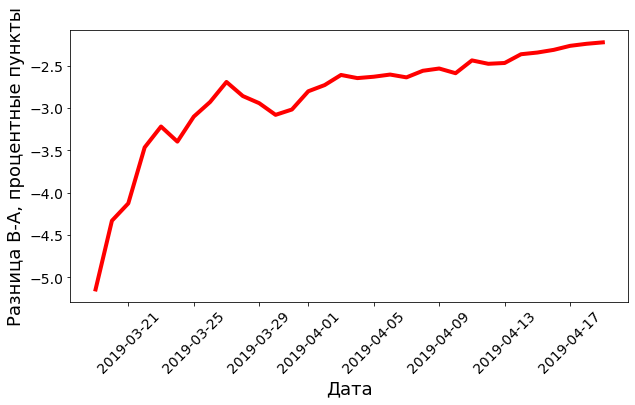

In [75]:
diff = pd.DataFrame(c_clean.conversion.loc['B'] - c_clean.conversion.loc['A'])
# diff.plot(kind='line',alpha=0.75, rot=0)
# plt.xlabel("")
# plt.show()
fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(diff*100,color='red',linewidth=4)
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Дата",fontsize=18)
plt.ylabel("Разница В-А, процентные пункты",fontsize=18)

Text(0, 0.5, 'p-value, логарифм. шкала')

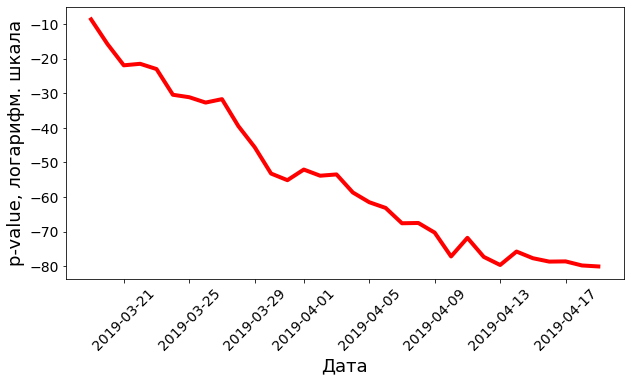

In [76]:
from statsmodels.stats.proportion import proportions_ztest
new_ar=[]
for i in range(len(c_clean.loc['A'])):
    count = np.array([c_clean.response.loc['A'][i], c_clean.response.loc['B'][i]])
    nobs = np.array([c_clean.view.loc['A'][i], c_clean.view.loc["B"][i]])
    stat, pval = proportions_ztest(count, nobs)
    new_ar.append(pval)
    
p_value = pd.DataFrame(new_ar)
p_value = p_value.rename(columns={0: "p_val"})
p_value['date'] = c_clean.loc['B'].reset_index().d_view
p_value = p_value.set_index('date')


fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(np.log(p_value.p_val),color='red',linewidth=4)
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Дата",fontsize=18)
plt.ylabel("p-value, логарифм. шкала",fontsize=18)

# p_value.plot(kind='line',alpha=10, rot=0,logy=True,figsize=(15,10),fontsize = 18)
# plt.xlabel("")
# plt.show()

# Метрики в разрезе по спецам, без бота

In [77]:
a_views_by_spec_clean.groupby('case_id').view.describe()

,count,mean,std,min,25%,50%,75%,max
case_id,,,,,,,,
A,56817.0,1.579175,6.530392,0.0,0.0,0.0,1.0,346.0
B,57512.0,1.762119,7.458915,0.0,0.0,0.0,1.0,363.0


In [78]:
a_views_by_spec_clean.groupby('case_id').response.describe()

,count,mean,std,min,25%,50%,75%,max
case_id,,,,,,,,
A,56817.0,0.313762,2.109437,0.0,0.0,0.0,0.0,313.0
B,57512.0,0.310961,2.062350,0.0,0.0,0.0,0.0,209.0


## Как выглядит распределение метрик 
- "среднее число просмотров на спеца"  
- "среднее число откликов на спеца"

Text(0, 0.5, 'Число специалистов')

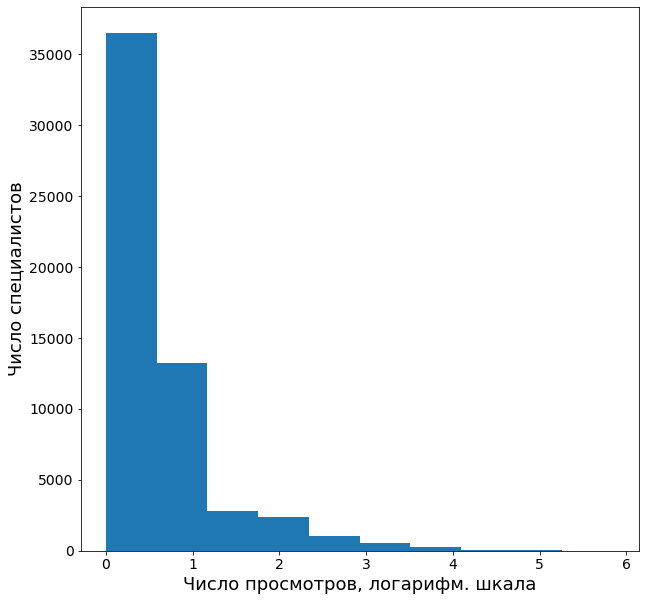

In [87]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
ax.hist(np.log(a_views_by_spec_clean.loc['A'].view+1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Число просмотров, логарифм. шкала",fontsize=18)
plt.ylabel("Число специалистов",fontsize=18)

Text(0, 0.5, 'Число специалистов')

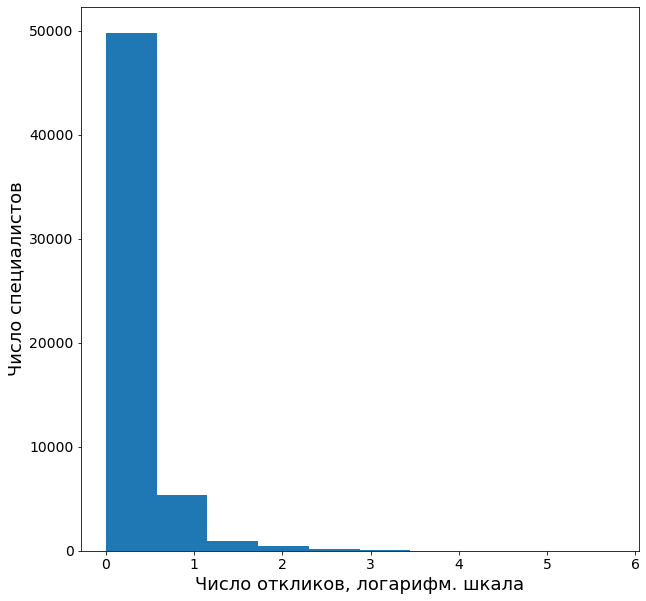

In [80]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
ax.hist(np.log(a_views_by_spec_clean.loc['A'].response+1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Число откликов, логарифм. шкала",fontsize=18)
plt.ylabel("Число специалистов",fontsize=18)

Распределение ненормальное, используем бутстреп

In [90]:
def bootstrap(arr,n=100,N_TRIAL = 1000,func = np.mean):
    res = []
    n = min(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        if len(arr.shape)>1:
            ind = np.random.choice(np.arange(arr.shape[0]), size = (n,))
            subsample = arr.iloc[ind]
        else:
            subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

## Просмотры, значимость

In [91]:
samples_a = bootstrap(a_views_by_spec_clean.query("case_id=='A'")['view'],N_TRIAL = 3000)
samples_b = bootstrap(a_views_by_spec_clean.query("case_id=='B'")['view'],N_TRIAL = 3000)

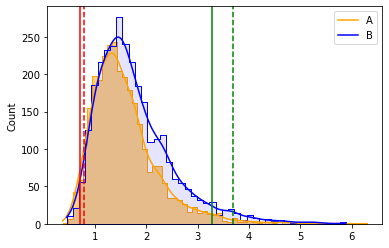

In [108]:
import seaborn as sns
ax = sns.histplot(samples_a, label='A', kde=True, color='orange', element="step", alpha=.5)
sns.histplot(samples_b, ax=ax, label='B', kde=True, color='b', element="step", alpha=.1)
ax.legend(['A', 'B'])
ax.axvline(np.percentile(samples_a, 2.5), linestyle='-', color='r')
ax.axvline(np.percentile(samples_a, 97.5), linestyle='-', color='g')

ax.axvline(np.percentile(samples_b, 2.5), linestyle='--', color='r')
ax.axvline(np.percentile(samples_b, 97.5), linestyle='--', color='g')

Доверительные интервалы пересекаются, значит значимых отличий нет

In [109]:
buf = []
for i in range(1000):
    a_sample =  a_views_by_spec_clean.query("case_id=='A'")['view'].sample(100)
    b_sample =  a_views_by_spec_clean.query("case_id=='B'")['view'].sample(100)
    buf.append(np.mean(b_sample)-np.mean(a_sample))

min = -1.94025 max = 2.16025


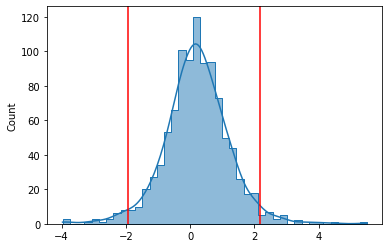

In [110]:
ax_buf = sns.histplot(buf, kde=True, element="step")
ax_buf.axvline(np.percentile(buf,2.5),linestyle = '-',color='r')
ax_buf.axvline(np.percentile(buf,97.5),linestyle = '-',color='r')
print('min =',np.percentile(buf,2.5),'max =',np.percentile(buf,97.5))

Распределение вокруг 0, значит варианты мало отличаются

## Отклики, значимость

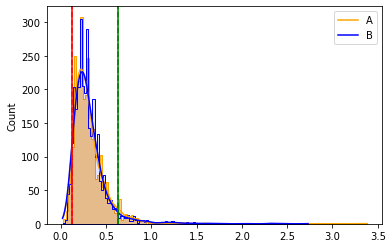

In [111]:
samples_a_resp = bootstrap(a_views_by_spec_clean.query("case_id=='A'")['response'],N_TRIAL = 3000)
samples_b_resp = bootstrap(a_views_by_spec_clean.query("case_id=='B'")['response'],N_TRIAL = 3000)
ax = sns.histplot(samples_a_resp, label='A', kde=True, color='orange', element="step", alpha=.5)
sns.histplot(samples_b_resp, ax=ax, label='B', kde=True, color='b', element="step", alpha=.1)
ax.legend(['A','B'])
ax.axvline(np.percentile(samples_a_resp,5),linestyle = '-',color='r')
ax.axvline(np.percentile(samples_a_resp,95),linestyle = '-',color='g')

ax.axvline(np.percentile(samples_b_resp,5),linestyle = '--',color='r')
ax.axvline(np.percentile(samples_b_resp,95),linestyle = '--',color='g')

In [112]:
buf_1=[]
for i in range(1000):
    a_sample =  a_views_by_spec_clean.query("case_id=='A'")['response'].sample(100)
    b_sample =  a_views_by_spec_clean.query("case_id=='B'")['response'].sample(100)
    buf_1.append(np.mean(b_sample)-np.mean(a_sample))

min = -0.59 max = 0.4502499999999998


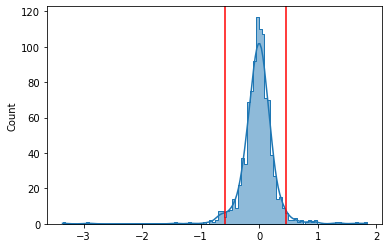

In [113]:
ax_buf = sns.histplot(buf_1, kde=True, element="step")
ax_buf.axvline(np.percentile(buf_1,2.5),linestyle = '-',color='r')
ax_buf.axvline(np.percentile(buf_1,97.5),linestyle = '-',color='r')
print('min =',np.percentile(buf_1,2.5),'max =',np.percentile(buf_1,97.5))

https://towardsdatascience.com/ab-testing-with-python-e5964dd66143

https://www.kaggle.com/code/tammyrotem/ab-tests-with-python/notebook